### Programa de Estudios Superiores 2019-2020
### Programación I - proyecto final
#### Elaborado por <span class="alert alert-info"> ***Andrés Miguel Ortiz Flores*** </span><br>
***
***Instrucciones generales:*** resuelve el siguiente problema de acuerdo a la especificación dada. 
- El código debe ir comentado para explicar la lógica y debe ser totalmente funcional para ser considerado correcto. De lo contrario, la calificación podrá ser subjetiva.
- Al final de la definición de la clase, obtenga una instancia y muestra que el objeto se comporta de acuerdo a las especificaciones deseadas, para poder calificarte más rápidamente.
***

# Estimador de desviación estándar *leave-one-out (LOO)* 

Considere un conjunto de datos $(x_{1i}, \ldots, x_{6i})$ y $y_i$, donde $i = 1, \ldots, n$. A partir de este conjunto, es posible estimar el modelo de regresión lineal:

$$ y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i}+ \beta_4 x_{4i}+ \beta_5 x_{5i}+ \beta_6 x_{6i}$$ 

el cual puede expresarse en forma matricial como $y = X\beta$, donde $\beta$ corresponde al vector de parámetros del modelo.

En cierta ocasión, un profesor de econometría se encontraba estudiando nuevas formas de obtener estimadores para la varianza de los parámetros muestrales. Después de mucho pensar, este ingenioso profesor resulta con un método de estimación denominado *leave-one-out estimator* (estimador de "deja uno afuera") que consiste en un proceso iterativo con el conjunto de datos: 

1. Para cada $i$ en el conjunto de datos:  

    - Se elimina temporalmente la observación $i$ del conjunto para obtener el conjunto "modificado" $X_{-i}$.
    
    - Se estima el modelo de regresión lineal resultante $y^* = X_{-i}\beta$
    
    - Se guarda el resultado del parámetro $\beta^{(i)}$ de interés, donde $i$ denota que $\beta$ se estimó sin la observación $i$. 
    
2. Al final del proceso iterativo, se estima la desviación estándar del conjunto $\lbrace\beta^{(1)}, ..., \beta^{(n)}\rbrace$ para obtener el estimador LOO del parámetro.

A continuación, se muestra una imagen representativa del proceso iterativo sobre el conjunto de datos. En cada iteración, se estima con las muestras en blanco y se elimina temporalmente la observación en gris.

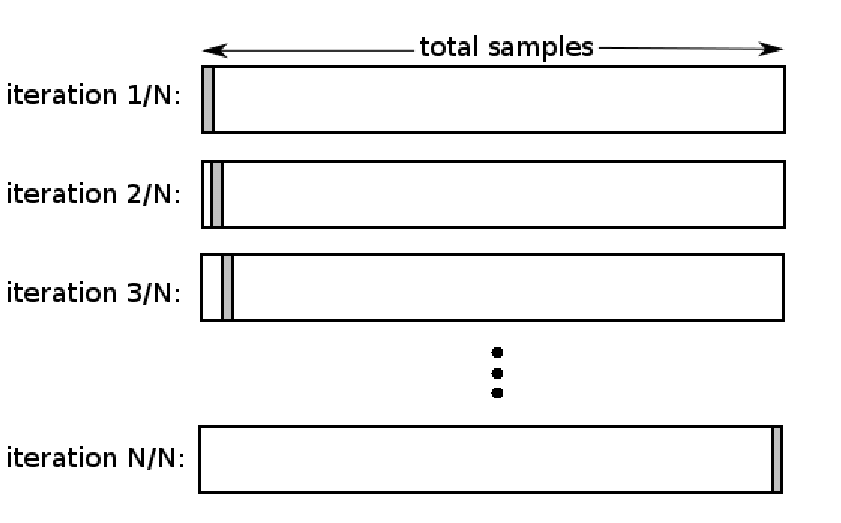 

Después de ocurrírsele este método al profesor, se dió cuenta que no sabía cómo llevar a cabo este proceso iterativo, ya que su habitual programa (software) de trabajo no permitía este tipo de procedimientos. Sin embargo, el profesor se recordó de su brillante amigo, que ha llevado recientemente un curso de programación en Python, y decide pedirle ayuda con esta tarea. Cuando el profesor contacta a su amigo, éste le dice que está muy cansado debido al curso que recién ha tomado, sin embargo, el profesor insiste en pedir su ayuda. 

Finalmente, después de recordar viejos tiempos y la invitación a un par de cervezas, el profesor logra convencer a su amigo de que lo ayude. Para esto, su amigo piensa resolver este problema a través de la implementación de una clase de Python. 

## Descripción de la clase

El amigo del profesor va a implementar la solución a través de la clase `looEstimation` de la siguiente forma:

- Al crear un objeto de esta clase, el constructor debe recibir el conjunto de datos `data`, cuya primera columna será de unos, luego estarán las variables $x$ y finalmente, la última columna corresponde a la variable $y$.

Además, deberá implementar los siguientes métodos:

- Método `estimate`, que lleve a cabo el proceso de estimación sobre una matriz $X$ y vector $y$ para estimar todos los parámetros del modelo, los cuales devolverá como un arreglo de numpy.

- Método `looSD`, que utilizará el método anterior sobre los datos guardados en el constructor y llevará a cabo el proceso iterativo $\lbrace\beta^{(1)}, ..., \beta^{(n)}\rbrace$. Finalmente, devolverá la desviación estándar del conjunto de parámetros.
    - Se deben guardar los parámetros de cada iteración en alguna estructura (pandas o ndarray) para ser consumidos por los siguientes métodos.
    
- Método `plotDistribution`, que realizará una gráfica del histograma para cada uno de los diferentes parámetros del modelo.
    - Deberá agregar una opción booleana savePlots para escoger si guardar las gráficas en un formato de alta calidad (pdf, png).
    
- Método `getParameters`, que devolverá un `DataFrame` con los parámetros estimados en cada iteración del proceso.
    - Permite el parámetro booleano `saveCSV` para determinar si se debe guardar este `DataFrame` en un archivo CSV.

<div class="alert alert-info">
<b>Importe los paquetes que sean necesarios</b>: <br>


</div>

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import statsmodels.formula.api as sm

<div class="alert alert-info">
<b>Escriba su código en la celda siguiente</b>: <br>


</div>

In [105]:
class looEstimation:
    ''' 
        Recibe el conjunto de datos `data`, cuya primera columna será 
        de unos, luego estarán las variables $x$ y finalmente, la última
        columna corresponde a la variable $y$.
    '''
    #Se carga el archivo tipo ".npy" y lo convierte a un DataFrame
    np.load('data.npy')
    df = pd.DataFrame({ '1´s': data[0:50,0], 'x1': data[0:50,1], 'x2': data[0:50,2],'x3': data[0:50,3],'x4': data[0:50,4],'x5': data[0:50,5],'x6': data[0:50,6],'y': data[0:50,7]})
    
    def __init__(self, data):
        
        self.data = df
                
    '''
        lleve a cabo el proceso de estimación sobre una matriz $X$ y 
        vector $y$ para estimar todos los parámetros del modelo, los 
        cuales devolverá como un arreglo de numpy
    '''
    def estimate(self):
        result = sm.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=df).fit()
        print(result.summary())
        return result.params
    
    '''
        Utiliza el método estimate sobre los datos guardados en el constructor 
        y llevará a cabo el proceso iterativo. Se deben guardar los parámetros 
        de cada iteración en alguna estructura (pandas o ndarray) para 
        ser consumidos por los siguientes métodos.
    '''
    def looSD(self):
        pass
    
    '''
        Realiza una gráfica del histograma para cada uno de los diferentes
        parámetros del modelo. La opción booleana savePlots sirve para escoger 
        si guardar las gráficas en un formato de alta calidad (pdf, png).
    '''
    def plotDistribution(self, savePlots=False):
        
        g=dflooSD.groupby('Intercept')["B1"]["B2"]["B3"]["B4"]["B5"]["B6"]
        g.plot(kind = "bar", color = "g")
        
        return
    
    
    '''
        Devuelve un `DataFrame` con los parámetros estimados en cada iteración 
        del proceso. Permite el parámetro booleano `saveCSV` para determinar si 
        se debe guardar este `DataFrame` en un archivo CSV.
    '''
    def getParameters(self):
        pass

***
## Área de pruebas personal

Utilice el siguiente espacio para llevar a cabo **sus** pruebas.


In [5]:
# Se proporciona el archivo de datos para trabajar
# (1's, x1, x2, x3, x4, x5, x6, y)
data = np.load('data.npy')
data.shape

(50, 8)

In [7]:
df = pd.DataFrame({ '1´s': data[0:50,0], 'x1': data[0:50,1], 'x2': data[0:50,2],'x3': data[0:50,3],'x4': data[0:50,4],'x5': data[0:50,5],'x6': data[0:50,6],'y': data[0:50,7]})

In [10]:
df

,1´s,x1,x2,x3,x4,x5,x6,y
0,1.0,16.0,1.0,3.0,5.718175,5.742968,3.624304,34.821257
1,1.0,5.0,19.0,0.0,7.216032,3.051358,9.017310,44.805892
2,1.0,11.0,3.0,5.0,5.354822,0.525216,8.023288,31.087359
3,1.0,19.0,18.0,0.0,1.503741,3.070216,9.538864,37.993154
4,1.0,19.0,13.0,0.0,2.817544,3.089195,0.485237,21.412420
5,1.0,3.0,0.0,11.0,6.937627,8.658586,8.203759,47.319769
6,1.0,13.0,19.0,3.0,1.524134,0.658181,4.706758,26.711993
7,1.0,13.0,0.0,0.0,9.663613,3.302648,2.049603,32.951088
8,1.0,2.0,8.0,15.0,8.862070,0.699296,9.240629,47.690221
9,1.0,4.0,12.0,11.0,9.520994,1.558143,0.291961,35.345688


In [16]:
result = sm.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     390.5
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           8.07e-36
Time:                        09:02:31   Log-Likelihood:                -87.836
No. Observations:                  50   AIC:                             189.7
Df Residuals:                      43   BIC:                             203.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6917      0.943     -0.733      0.4

In [20]:
result.params

Intercept   -0.691715
x1           0.285130
x2           0.473372
x3           0.671312
x4           2.074063
x5           1.527403
x6           1.733444
dtype: float64

In [23]:
result.params.values

array([-0.69171456,  0.28512965,  0.47337168,  0.67131171,  2.07406304,
        1.52740284,  1.733444  ])

In [52]:
for index, row in df.iterrows():
    dfmin1=df.drop([index], axis=0)
    reslooSD = sm.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=dfmin1).fit()
    print(reslooSD.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     392.2
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           3.24e-35
Time:                        10:49:28   Log-Likelihood:                -85.897
No. Observations:                  49   AIC:                             185.8
Df Residuals:                      42   BIC:                             199.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7027      0.941     -0.747      0.4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     384.5
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           4.86e-35
Time:                        10:49:28   Log-Likelihood:                -86.375
No. Observations:                  49   AIC:                             186.8
Df Residuals:                      42   BIC:                             200.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6526      0.953     -0.685      0.4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     353.1
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           2.82e-34
Time:                        10:49:29   Log-Likelihood:                -86.176
No. Observations:                  49   AIC:                             186.4
Df Residuals:                      42   BIC:                             199.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4950      0.976     -0.507      0.6

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     389.6
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           3.72e-35
Time:                        10:49:29   Log-Likelihood:                -85.822
No. Observations:                  49   AIC:                             185.6
Df Residuals:                      42   BIC:                             198.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9919      0.976     -1.017      0.3

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     387.2
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           4.21e-35
Time:                        10:49:29   Log-Likelihood:                -86.031
No. Observations:                  49   AIC:                             186.1
Df Residuals:                      42   BIC:                             199.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7281      0.945     -0.771      0.4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     364.3
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.48e-34
Time:                        10:49:29   Log-Likelihood:                -85.937
No. Observations:                  49   AIC:                             185.9
Df Residuals:                      42   BIC:                             199.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9635      0.977     -0.986      0.3

In [53]:
for index, row in df.iterrows():
    dfmin1=df.drop([index], axis=0)
    reslooSD = sm.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=dfmin1).fit()
    print(reslooSD.params.values)

[-0.70271448  0.27831498  0.47896714  0.67569743  2.06795334  1.51640107
  1.73909175]
[-0.69825266  0.2845345   0.474676    0.67030114  2.07468817  1.52806186
  1.73512474]
[-0.59082542  0.28832672  0.46532238  0.66983526  2.07242831  1.50291976
  1.75030682]
[-0.64716941  0.28227976  0.47073752  0.67289317  2.07859644  1.52597541
  1.72581749]
[-0.65831221  0.28926363  0.47573083  0.66812134  2.07290743  1.530023
  1.72444141]
[-0.72153995  0.27918892  0.46711963  0.66986009  2.07801256  1.55753959
  1.74520716]
[-0.70682282  0.28479214  0.47134     0.67199235  2.07721606  1.52950372
  1.73278555]
[-0.76777866  0.28161675  0.48014939  0.67725802  2.0527445   1.52863318
  1.7483096 ]
[-0.73769546  0.28190301  0.47283582  0.67885626  2.08654157  1.50575759
  1.74709664]
[-0.65255226  0.28261658  0.47553513  0.6732693   2.08750125  1.52180018
  1.71864218]
[-0.68466835  0.28177359  0.46949976  0.67222046  2.08075925  1.52865334
  1.74076022]
[-0.67732141  0.28392416  0.47347079  0.67067

In [99]:
arr = np.array([])
for index, row in df.iterrows():
    dfmin1=df.drop([index], axis=0)
    reslooSD = sm.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=dfmin1).fit()
    arr = np.column_stack((arr, reslooSD.params.values))
print(arr)

TypeError: data type not understood

In [87]:
for index, row in df.iterrows():
    dflooSD = pd.DataFrame(columns=['Intercept', 'B1', 'B2','B3','B4','B5','B6'])
    dfmin1=df.drop([index], axis=0)
    reslooSD = sm.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=dfmin1).fit()
    dflooSD = dflooSD.append({"Intercept" : reslooSD.params.values[0] ,"B1" : reslooSD.params.values[1],"B2" : reslooSD.params.values[2],"B3" : reslooSD.params.values[3],"B4" : reslooSD.params.values[3],"B5" : reslooSD.params.values[4],"B6" : reslooSD.params.values[5]}, ignore_index=True)
    
    print(dflooSD )

   Intercept        B1        B2        B3        B4        B5        B6
0  -0.702714  0.278315  0.478967  0.675697  0.675697  2.067953  1.516401
   Intercept        B1        B2        B3        B4        B5        B6
0  -0.698253  0.284534  0.474676  0.670301  0.670301  2.074688  1.528062
   Intercept        B1        B2        B3        B4        B5       B6
0  -0.590825  0.288327  0.465322  0.669835  0.669835  2.072428  1.50292
   Intercept       B1        B2        B3        B4        B5        B6
0  -0.647169  0.28228  0.470738  0.672893  0.672893  2.078596  1.525975
   Intercept        B1        B2        B3        B4        B5        B6
0  -0.658312  0.289264  0.475731  0.668121  0.668121  2.072907  1.530023
   Intercept        B1       B2       B3       B4        B5       B6
0   -0.72154  0.279189  0.46712  0.66986  0.66986  2.078013  1.55754
   Intercept        B1       B2        B3        B4        B5        B6
0  -0.706823  0.284792  0.47134  0.671992  0.671992  2.077216  1

In [103]:
dflooSD["B1"].std()

nan

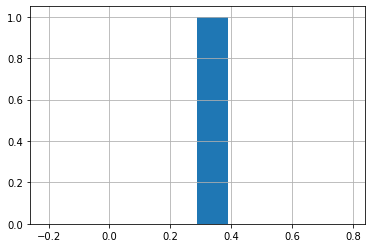

In [102]:
dflooSD['B1'].hist()

***
## Área de pruebas para calificación

Utilice el siguiente espacio para mostrarnos su implementación terminada.

<div class="alert alert-info">
<b>Pruebe el método "estimate"</b>: <br>
</div>

<div class="alert alert-info">
<b>Pruebe el método "looSD"</b>: <br>
</div>

<div class="alert alert-info">
<b>Pruebe el método "plotDistribution"</b>: <br>
</div>

<div class="alert alert-info">
<b>Pruebe el método "getParameters"</b>: <br>
</div>

<div class="alert alert-info">
<b>Muestre cada uno de los atribujos del objeto utilizado en el ejemplo</b>: <br>
</div>